In [1]:
import chess
import chess.engine
import random
import numpy

def random_board(max_depth= 200):
    board = chess.Board()
    depth = random.randrange(1, max_depth)
    for _ in range(depth):
        move = random.choice(list(board.legal_moves))
        board.push(move)
        if board.is_game_over():
            break
    return board, depth

def stockfish(board, depth):
    engine = chess.engine.SimpleEngine.popen_uci("../stockfish/stockfish-windows-x86-64-avx2")
    result = engine.analyse(board, chess.engine.Limit(depth=depth))
    engine.quit()
    return result


In [2]:
board, depth = random_board()

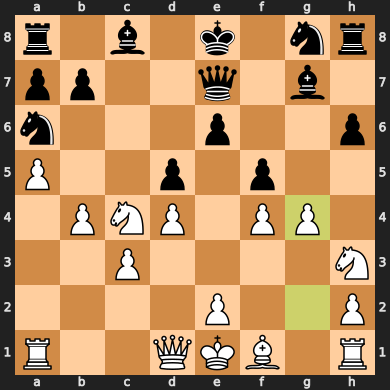

In [3]:
board

In [4]:
stockfish(board, 10)

{'string': 'NNUE evaluation using nn-5af11540bbfe.nnue enabled',
 'depth': 10,
 'seldepth': 8,
 'multipv': 1,
 'score': PovScore(Cp(+470), BLACK),
 'nodes': 1425,
 'nps': 712500,
 'hashfull': 0,
 'tbhits': 0,
 'time': 0.002,
 'pv': [Move.from_uci('d5c4'),
  Move.from_uci('g4f5'),
  Move.from_uci('e6f5'),
  Move.from_uci('e2e4')]}

In [5]:
import chess
# load board from fen

def load_board(fen: str):
    return chess.Board(fen)





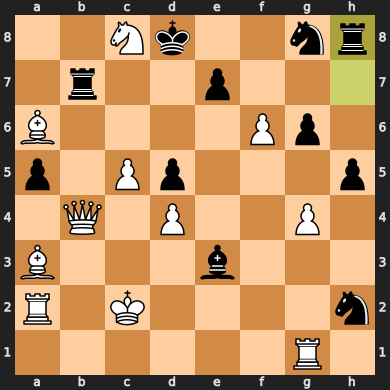

In [ ]:
board

### Generate training data

In [ ]:
def get_best_move(board:chess.Board)->chess.Board:
    board = board.copy()
    if board.is_checkmate():
        return None
    result = stockfish(board, depth=10)
    next_move = result["pv"][0]
    board.push(next_move)
    return board

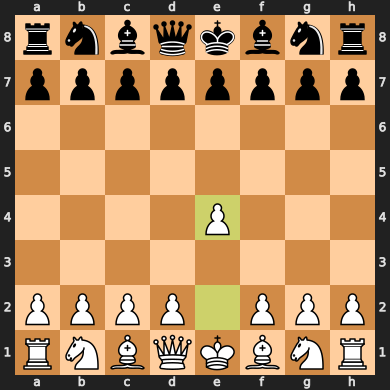

In [ ]:
get_best_move(chess.Board('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq -'))

In [ ]:
import pandas as pd

def save_positions_to_csv(positions, best_moves, save_path: str):
    # check if there is some data in the csv the add a header or not 
    df = pd.DataFrame({'position': positions, 'best_move': best_moves})
    df.to_csv(save_path, index=False, header=False, mode='a')
    

def generate_positions(nb_positions: int, save_path: str = None):
    positions = []
    best_moves = []
    depths = []
    i = 0
    test = 0
    while i < nb_positions:
        board, depth = random_board()
        if board.is_checkmate():
            test += 1
            continue
        depths.append(depth)
        best_move = get_best_move(board)
        positions.append(board.fen())
        best_moves.append(best_move.fen())
        i += 1
    if save_path:
        save_positions_to_csv(positions, best_moves, save_path)
    return positions, best_moves, depths, test

In [ ]:
positions, best_moves, depths, test = generate_positions(100, '../data/generated_positions/data1.csv')

0


<Axes: >

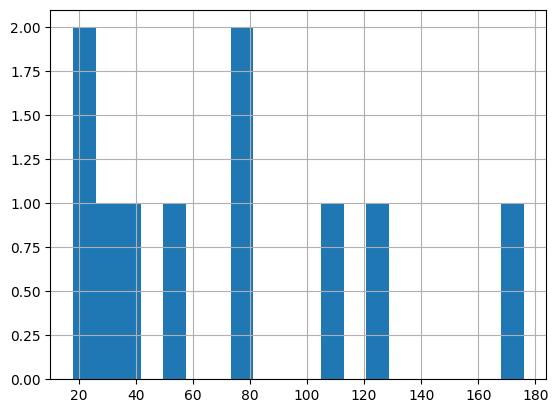

In [ ]:
depth_df = pd.DataFrame(depths, columns=['depth'])
print(test)
depth_df['depth'].hist(bins=20)